In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
df = pd.read_csv("AnimeListGenre.csv")
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
df.drop(['title_english', 'title_japanese', 'title_synonyms', 'image_url', 'source', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'scored_by','rank', 'popularity', 'favorites', 'premiered', 'broadcast', 'related', 'licensor', 'opening_theme', 'ending_theme'], axis=1, inplace=True)
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,26,7.89,204003,NaN,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,NaN,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,NaN,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen"


In [4]:
df.shape

(14478, 10)

In [5]:
df.isnull().sum()

anime_id          0
title             0
type              0
episodes          0
score             0
members           0
background    13421
producer       6190
studio         5934
genre            64
dtype: int64

<AxesSubplot:>

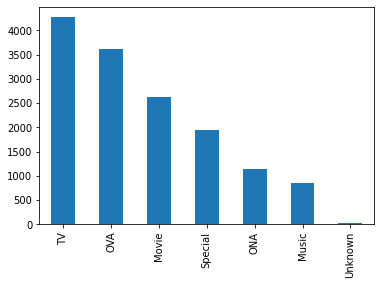

In [6]:
df['type'].value_counts().plot.bar()

In [7]:
df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre


In [8]:
missing = df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].copy()
missing.shape

(0, 10)

In [9]:
df.isnull().sum()

anime_id          0
title             0
type              0
episodes          0
score             0
members           0
background    13421
producer       6190
studio         5934
genre            64
dtype: int64

In [10]:
df[df['genre'].isnull()]

,anime_id,title,type,episodes,score,members,background,producer,studio,genre
88,29765,Metropolis (2009),Movie,1,6.26,467,NaN,Mirai Film,NaN,NaN
135,32644,Yaseruyagi,ONA,1,4.03,100,NaN,NaN,NaN,NaN
745,29764,Blend,Movie,1,4.49,209,NaN,Mirai Film,NaN,NaN
1120,32636,Hokori Inu no Hanashi,ONA,1,5.54,125,NaN,NaN,NaN,NaN
1165,30055,Mabeob Chunjamun: Daemawangui Buhwaleul Magala,Movie,1,4.38,67,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14036,37018,Season&#039;s Greetings 2017 from Dwarf,ONA,1,4.39,46,NaN,NaN,dwarf,NaN
14115,37767,Xing Fu Lu Shang,Movie,1,4.50,37,NaN,NaN,NaN,NaN
14137,28487,Ikite Iru,OVA,1,5.60,62,NaN,NaN,NaN,NaN
14306,35722,Aesop Douwa,OVA,3,4.29,67,NaN,NaN,NaN,NaN


In [11]:
df['genre'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id      False
title         False
type          False
episodes      False
score         False
members       False
background     True
producer       True
studio         True
genre         False
dtype: bool

In [12]:
df['producer'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id      False
title         False
type          False
episodes      False
score         False
members       False
background     True
producer      False
studio         True
genre         False
dtype: bool

In [13]:
df['studio'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id      False
title         False
type          False
episodes      False
score         False
members       False
background     True
producer      False
studio        False
genre         False
dtype: bool

In [14]:
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,26,7.89,204003,NaN,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,NaN,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,NaN,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen"


In [15]:
m = df.members.quantile(0.45)
C = df.score.mean()
print(m, C)

1179.6500000000005 6.142481696366902


In [16]:
def weighted_rating(df, m, C):
    term = df['members'] / (m + df['members'])
    return df['score'] * term + (1-term) * C

In [17]:
df['community_rating'] = df.apply(weighted_rating, axis=1, args=(m,C))
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre,community_rating
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",7.623844
1,2104,Seto no Hanayome,TV,26,7.89,204003,NaN,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",7.879953
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,NaN,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",7.526715
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",8.184189
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,NaN,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",8.653791


In [18]:
df = pd.concat([df, df['type'].str.get_dummies(), df['genre'].str.get_dummies(sep=',')], axis=1)
df.head()

,anime_id,title,type,episodes,score,members,background,producer,studio,genre,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,11013,Inu x Boku SS,TV,12,7.63,283882,Inu x Boku SS was licensed by Sentai Filmworks...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",...,0,0,0,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,26,7.89,204003,NaN,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",...,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,51,7.55,70127,NaN,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",...,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,TV,38,8.21,93312,Princess Tutu aired in two parts. The first pa...,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",...,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,TV,25,8.67,182765,NaN,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",...,0,0,0,0,0,0,0,0,0,0


In [19]:
anime_features = df.loc[:, "Movie":].copy()
anime_features.head()

,Movie,Music,ONA,OVA,Special,TV,Unknown,Adventure,Cars,Comedy,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
cosine_sim = cosine_similarity(anime_features.values, anime_features.values)

In [21]:
cosine_sim

array([[1.        , 0.73029674, 0.4       , ..., 0.        , 0.        ,
        0.31622777],
       [0.73029674, 1.        , 0.54772256, ..., 0.        , 0.        ,
        0.28867513],
       [0.4       , 0.54772256, 1.        , ..., 0.        , 0.        ,
        0.31622777],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.31622777, 0.28867513, 0.31622777, ..., 0.        , 0.        ,
        1.        ]])

In [22]:
cosine_sim.shape

(14478, 14478)

In [23]:
anime_index = pd.Series(df.index, index=df.title).drop_duplicates()

In [24]:
anime_index

title
Inu x Boku SS                                0
Seto no Hanayome                             1
Shugo Chara!! Doki                           2
Princess Tutu                                3
Bakuman. 3rd Season                          4
                                         ...  
Gutchonpa Omoshiro Hanashi               14473
Geba Geba Shou Time!                     14474
Godzilla: Hoshi wo Kuu Mono              14475
Nippon Mukashibanashi: Sannen Netarou    14476
Senjou no Valkyria Special               14477
Length: 14478, dtype: int64

In [25]:
def get_recommendation(anime_name, similarity=cosine_sim):
    idx = anime_index[anime_name]
    
    # Get the pairwsie similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    result = df[['title', 'genre', 'community_rating', 'type', 'episodes', 'studio']].iloc[anime_indices].drop(idx)
    return result

In [26]:
get_recommendation("Bleach").sort_values('community_rating', ascending=False)

,title,genre,community_rating,type,episodes,studio
2871,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,"Action, Adventure, Comedy, Supernatural, Drama...",8.613931,TV,39,David Production
6754,Noragami Aragoto,"Action, Adventure, Comedy, Supernatural, Shounen",8.405103,TV,13,Bones
17,Naruto: Shippuuden,"Action, Adventure, Comedy, Super Power, Martia...",8.176978,TV,500,Studio Pierrot
4320,D.Gray-man,"Action, Adventure, Comedy, Super Power, Demons...",8.154396,TV,103,TMS Entertainment
6323,Noragami,"Action, Adventure, Comedy, Supernatural, Shounen",8.147206,TV,12,Bones
4504,Naruto,"Action, Adventure, Comedy, Super Power, Martia...",7.877912,TV,220,Studio Pierrot
3958,Shaman King,"Action, Adventure, Comedy, Supernatural, Drama...",7.820807,TV,64,Xebec
10831,Ushio to Tora (TV),"Action, Adventure, Comedy, Demons, Shounen, Su...",7.655678,TV,26,"MAPPA, Studio VOLN"
11078,Bleach: The Sealed Sword Frenzy,"Action, Adventure, Comedy, Super Power, Supern...",7.037130,Special,1,Studio Pierrot
2614,Yozakura Quartet,"Action, Magic, Comedy, Super Power, Supernatur...",6.909877,TV,12,Nomad


In [27]:
df['title'].values

array(['Inu x Boku SS', 'Seto no Hanayome', 'Shugo Chara!! Doki', ...,
       'Godzilla: Hoshi wo Kuu Mono',
       'Nippon Mukashibanashi: Sannen Netarou',
       'Senjou no Valkyria Special'], dtype=object)

In [28]:
df.to_dict()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11372/2779973161.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  df.to_dict()


{'anime_id': {0: 11013,
  1: 2104,
  2: 5262,
  3: 721,
  4: 12365,
  5: 6586,
  6: 178,
  7: 2787,
  8: 4477,
  9: 853,
  10: 4814,
  11: 7054,
  12: 11123,
  13: 14227,
  14: 269,
  15: 59,
  16: 6045,
  17: 1735,
  18: 210,
  19: 4224,
  20: 10030,
  21: 74,
  22: 4722,
  23: 14397,
  24: 1557,
  25: 10800,
  26: 3731,
  27: 9513,
  28: 5835,
  29: 9863,
  30: 7817,
  31: 966,
  32: 120,
  33: 957,
  34: 21,
  35: 1974,
  36: 857,
  37: 1914,
  38: 249,
  39: 6645,
  40: 5690,
  41: 1571,
  42: 11759,
  43: 7674,
  44: 1698,
  45: 14713,
  46: 232,
  47: 233,
  48: 9656,
  49: 9926,
  50: 2564,
  51: 3092,
  52: 1579,
  53: 32370,
  54: 11547,
  55: 33185,
  56: 7518,
  57: 16642,
  58: 7605,
  59: 9389,
  60: 34152,
  61: 9998,
  62: 153,
  63: 27417,
  64: 5588,
  65: 23903,
  66: 13247,
  67: 33398,
  68: 1051,
  69: 12447,
  70: 3294,
  71: 1381,
  72: 8022,
  73: 32666,
  74: 33775,
  75: 20667,
  76: 37447,
  77: 35277,
  78: 14353,
  79: 32747,
  80: 5235,
  81: 8154,
  82: 5

In [29]:
import pickle
pickle.dump(cosine_sim,open('similarityGenre.pkl', 'wb'))
pickle.dump(df,open('animeGenre.pkl','wb'))